# Set Up Notebook

In [1]:
# setup notebook for interactive graphs
%matplotlib widget

In [2]:
# configure toggles

load_google_news = True
load_glove = True
load_brown_corpus = True


## Set up corpuses

In [3]:
corpus_bark = [
    ["Dog", "Bark"],
    ["Tree", "Bark"],
    ["Dog","Sound", "Bark"],
    ["Tree", "Sound", "Creak"]
]

corpus_food = [
    ["Dog"],
    ["Cat"],
    ["Rabbit"],
    ["Fish"],
    ["Dog", "Fish"],
    ["Cat", "Fish"],
    ["Cat", "and", "Dog"],
    ["Chips"],
    ["Fish", "and", "Chips"],
    ["Burger"],
    ["Burger", "and", "Chips"],
    ["Burger", "Dinner"],
    ["Fish", "Dinner"],
    ["Chips", "Dinner"],
    ["Rabbit", "Pet"],
    ["Fish", "Pet"],
    ["Cat", "Pet"],
    ["Dog", "Pet"]
]

corpus_capital = [
    ["Paris", "Capital"],
    ["Rome", "Capital"],
    ["Rome", "Italy"],
    ["Paris", "France"],
    ["Italy", "Country"],
    ["France", "Country"],
    ["England", "Country"],
    ["London", "England"],
    ["London", "Capital"],
    ["Cardiff", "Wales"],
    ["Wales", "Country"],
    ["Cardiff", "Capital"],
    ["Madrid", "Spain"],
    ["Madrid", "Capital"],
    ["Spain", "Country"],
    ["Edinburgh", "Scotland"],
    ["Scotland", "Country"],
    ["Edinburgh", "Capital"],
    ["Greece", "Athens"],
    ["Athens", "Capital"],
    ["Greece", "Country"]
]

corpus_capital_small = [
    ["Paris", "Capital"],
    ["Rome", "Capital"],
    ["Rome", "Italy"],
    ["Paris", "France"],
    ["Italy", "Country"],
    ["France", "Country"]
]

In [4]:
import nltk
from nltk.corpus import brown

if load_brown_corpus:
    nltk.download('brown')
    corpus_brown = brown.sents()


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\danca\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Load pretrained embeddings models

bark has very small magnitude because it is the least discriminating.

sound has the most different vector as it is the most discriminating

dog and tree have similar vectors even though they don't co-occur, is this interference? i think so

In [5]:
# dictionary to hold all loaded models
loaded_models = {}

In [6]:
#wrap glove and google news so they can be treated in the same way as the trained models
class wrapper:
  def __init__(self, model):
    self.wv = model
    self.vector_size = model.vector_size
  
  def __str__(self) -> str:
    return f"model<vocab=?, vector_size={self.vector_size}>"

In [7]:
import gensim.downloader as api

if load_google_news:
    model_google_news = api.load('word2vec-google-news-300')
    model_google_news_wrapped = wrapper(model_google_news)
    loaded_models["google_news"] = model_google_news_wrapped
    print("google news loaded")

google news loaded


In [8]:
if load_glove:
    model_glove = api.load("glove-wiki-gigaword-50")
    model_glove_wrapped = wrapper(model_glove)
    loaded_models["glove"] = model_glove_wrapped
    print("glove loaded")

glove loaded


# Tooling

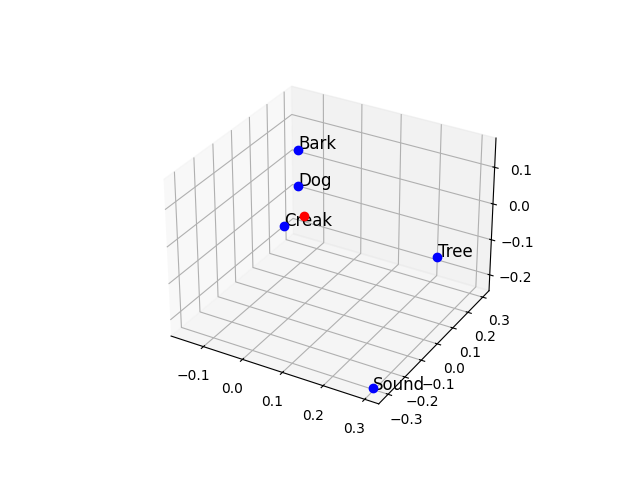

In [9]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

def train_model(corpus, dimensions):
  # Train Word2Vec model
  model = Word2Vec(corpus, vector_size=dimensions, window=5, min_count=1, sg=1)
  return model

def corpus_vocab(corpus):
  return np.unique([word for sublist in corpus for word in sublist])

def getCoords(vocab, model):
  xs = []
  ys = []

  for word in vocab:
    v = model.wv[word]
    xs.append(v[0])
    ys.append(0)
  return xs, ys

def plot_on_graph(point, annotation, graph):
  graph.plot(point[0], point[1], point[2],  'go')
  graph.text(point[0] * (1 + 0.01), point[1] * (1 + 0.01), point[2] * (1 + 0.01) , annotation, fontsize=12)
  return graph

def plot_point(point, ax, dimensions, colour):
  v = point["vector"]
  if dimensions <=2:
    ax.plot(v[0], v[1], colour)
    ax.text(v[0] * (1 + 0.01), v[1] * (1 + 0.01) , point["annotation"], fontsize=12)

  elif dimensions >=3:
    # syntax for 3-D projection
    ax.plot(v[0], v[1], v[2], colour)
    ax.text(v[0] * (1 + 0.01), v[1] * (1 + 0.01) , v[2] * (1 + 0.01) , point["annotation"], fontsize=12, zorder=1)
  return ax

def plot(points, dimensions, additional_points):
  fig = plt.figure()
  if dimensions>=3:
    ax = plt.axes(projection ='3d')
    #plot origin
    ax.plot(0, 0, 0, 'ro')
  elif dimensions==2:
    ax = plt.axes()
    #plot origin
    ax.plot(0, 0, 'ro')
  
  for i, p in enumerate(points):
    ax = plot_point(p, ax, dimensions, "bo")
  for i, p in enumerate(additional_points):
    ax = plot_point(p, ax, dimensions, "go")
    
  return fig

def prepare_word_plots(vocab, model):
  points = []
  for i, word in enumerate(vocab):
    v = model.wv[word]
    p = {
      "annotation": word,
      "vector": v
    }
    points.append(p)

  return points

def all(corpus, dimensions):
  vocab = corpus_vocab(corpus)
  model = train_model(corpus, dimensions)
  word_points = prepare_word_plots(vocab, model)
  points = word_points
  additional_points = []
  graph = plot(points, dimensions, additional_points)
  return model, vocab, graph

#all(corpus, 1)
model, vocab, graph = all(corpus_bark, 3)
#v1 = model.wv["Rome"]-model.wv["Italy"]+model.wv["France"]
#v2 = model.wv["Paris"]
#print(model.wv.cosine_similarities(v1, [v2]))
#plot_on_graph([0,1,2], "", graph)


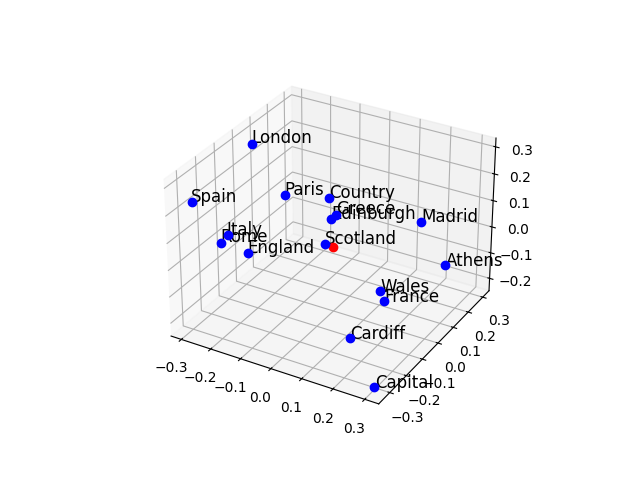

In [10]:
model, vocab, graph = all(corpus_capital, 3)

[0.58411497]
[-0.7114783]
[0.02557658]


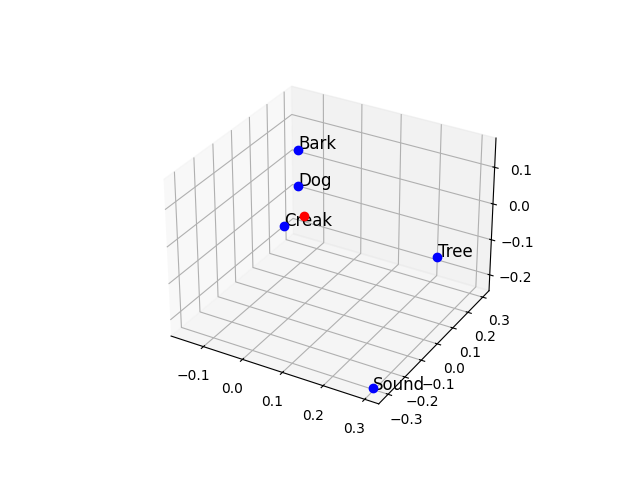

In [11]:
model, vocab, graph = all(corpus_bark, 3)
v1 = model.wv["Bark"]-model.wv["Dog"]+model.wv["Tree"]
v2 = model.wv["Tree"]
print(model.wv.cosine_similarities(v1, [v2]))

v1 = model.wv["Bark"]-model.wv["Tree"]+model.wv["Dog"]
v2 = model.wv["Sound"]
print(model.wv.cosine_similarities(v1, [v2]))

v1 = model.wv["Creak"]-model.wv["Tree"]+model.wv["Dog"]
v2 = model.wv["Bark"]
print(model.wv.cosine_similarities(v1, [v2]))

The cosine similarity ranges from -1 to 1:
1: Indicates identical vectors (perfect similarity).
0: Implies no similarity (orthogonal vectors).
-1: Represents opposite vectors (maximum dissimilarity).

len vocab:  860


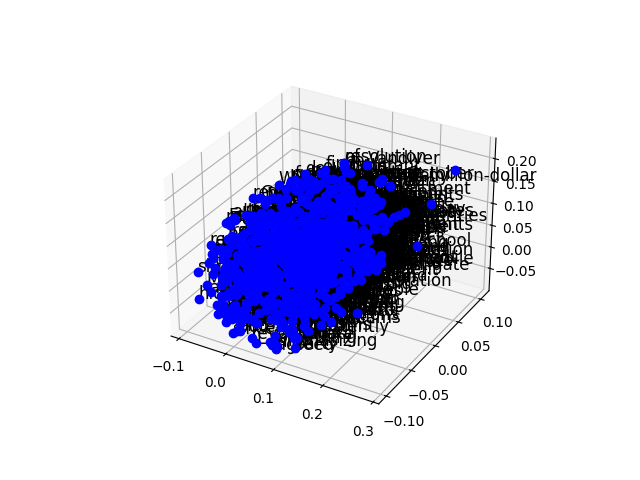

In [12]:
corpus = corpus_brown[:100]
brown_model, vocab, graph = all(corpus, 10) # todo, way to only plot subset of points on graph
model = brown_model
print("len vocab: ", len(vocab))

## Comparing different models

In [13]:
def compare(models, pairs):
    for model in models:
        for pair in pairs:
            v = model.wv[pair[0]] - model.wv[pair[1]]
            print(model.wv.most_similar(v))
    

compare([loaded_models["glove"], loaded_models["google_news"]], [("squirrel", "phone")])
compare([loaded_models["glove"], loaded_models["google_news"]], [("potato", "square")])
compare([loaded_models["glove"], loaded_models["google_news"]], [("poland", "yoga")])

[('nutkin', 0.7318739295005798), ('shrew', 0.724825918674469), ('grizzly', 0.6996013522148132), ('darner', 0.6786478757858276), ('rhinoceros', 0.6724755167961121), ('tarporley', 0.6670932769775391), ('lillies', 0.6641578078269958), ('louse', 0.6579570770263672), ('merda', 0.6428161859512329), ('e.n.d.', 0.6408583521842957)]
[('squirrel', 0.737991452217102), ('squirrels', 0.5947400331497192), ('fox', 0.4847506284713745), ('critters', 0.4617171287536621), ('gray_squirrel', 0.4523264169692993), ('red_tailed_hawk', 0.451271116733551), ('raccoon', 0.45003798604011536), ('monarch_caterpillars', 0.44542571902275085), ('bird', 0.44502314925193787), ('buzzard', 0.4445395767688751)]
[('nutsy', 0.6632758975028992), ('skippy', 0.6596720218658447), ('creamed', 0.6536835432052612), ('spaetzle', 0.6486536860466003), ('sawney', 0.6484820246696472), ('coleslaw', 0.6453075408935547), ('mashers', 0.6425214409828186), ('beet', 0.6403196454048157), ('vichyssoise', 0.6386362910270691), ('potato', 0.63555395

the most similar vector to orange-yoga is still orange. This means that either:
1. yoga has a small magnitude
2. yoga does not interfere with poland

We want to find a pair of words that reliably produces an unintuitive word when subtracted from each other. How do we do that?

Perhaps I need to look at the vectors and see which dimensions change.

# Experiments

for topics to be interfering, they have to be unrelated and non-co-occurring but close in vector space. Is this even possible given how embeddings work?



when I asked dad the difference between a car and a potato, he proceded to list certain differences such as not living, natural/unnatural, made out of components,

I suppose more what the difference is, is not the difference between their concepts, but the difference in how they occur in text - these things are related but not the same.

rearranging the equation may help understand.



In [14]:
#model_sizes = [10,20,50,300,3,4,5]
model_sizes = [3, 50]

brown_models = {}
for size in model_sizes:
    model_name = f"brown_{size}"
    print(f"training {model_name}")
    loaded_models[model_name] = train_model(corpus_brown, size)
    print(f"loaded {model_name}")


training brown_3
loaded brown_3
training brown_50
loaded brown_50


In [15]:
loaded_models["brown_3"]

In [29]:
import pandas as pd

# Define the columns
columns = ['model', 'dimensions', 'dimension', 'similar words (similarity)']

# Example data
data = []

class ModelResults:
    def __init__(self, model, model_name) -> None:
        self.model_name = model_name
        self.model = model
        self.similar_words = []
    
    # returns the most similar words to the vector maxed out in one dimension
    def max_dimension_words(self, top=5):
        min_values, max_values = self.max_dimension(model)
        for i in range(self.model.vector_size):
            max_magnitude = max_values[i]
            max_vector = np.zeros(self.model.vector_size)
            max_vector[i] = max_magnitude
            similar_words =self.model.wv.most_similar(max_vector)[:top]
            self.similar_words.append(similar_words)
    
    def max_dimension(self, model):
        vectors = np.array(model.wv.vectors)
        max_values = np.max(vectors, axis=0)
        min_values = np.min(vectors, axis=0)
        return min_values, max_values

    
    def __str__(self) -> str:
        return f"{self.model_name} - {self.model} - {self.similar_words[0]} "

    def toRows(self):
        rows = []
        for i in range(self.model.vector_size):
            row = {
                "model": self.model_name,
                "dimensions": self.model,
                "dimension": i,
                "similar words (similarity)": self.similar_words[i]
            }
            rows.append(row)
        return rows
    
    def get_similar_flat(self):
        #flatten similar words list of lists
        flat_list = [
            x
            for xs in self.similar_words
            for x in xs
        ]
        return flat_list




mr = ModelResults(loaded_models["brown_3"], "model_brown_3")
mr.max_dimension_words()
#print(mr)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(mr.toRows(), columns=columns)
# Set display options
pd.set_option('display.max_colwidth', None)  # or a large integer like 1000
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Set a large width to accommodate all columns

# Display the DataFrame
print(df)



           model                                         dimensions  dimension                                                                                                                                                similar words (similarity)
0  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          0  [(Snapped, 0.9731709957122803), (Compassionately, 0.9711021184921265), (maxim, 0.9692461490631104), (gulley, 0.9676837921142578), (Anthropologists, 0.9652993083000183)]
1  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          1                  [(Plants, 0.9997149109840393), (138, 0.999699056148529), (Galatians, 0.9987984299659729), (Innumerable, 0.9973782896995544), (Noon, 0.9972583651542664)]
2  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          2       [(reflectance, 0.9999967813491821), (occasioned, 0.9999955296516418), (noblest, 0.999992311000824), (Mennen, 0.9999907612800598), (unerringly, 0.9999862909317017)]


In [31]:
print(mr.get_similar_flat())


[('Snapped', 0.9731709957122803), ('Compassionately', 0.9711021184921265), ('maxim', 0.9692461490631104), ('gulley', 0.9676837921142578), ('Anthropologists', 0.9652993083000183), ('Plants', 0.9997149109840393), ('138', 0.999699056148529), ('Galatians', 0.9987984299659729), ('Innumerable', 0.9973782896995544), ('Noon', 0.9972583651542664), ('reflectance', 0.9999967813491821), ('occasioned', 0.9999955296516418), ('noblest', 0.999992311000824), ('Mennen', 0.9999907612800598), ('unerringly', 0.9999862909317017)]


In [32]:
results = []
model_results = []
for model_name, model in loaded_models.items():
    mr = ModelResults(model, model_name)
    mr.max_dimension_words()
    results = results + mr.toRows()
    model_results.append(mr)

df = pd.DataFrame(results, columns=columns)
# Display the DataFrame
df

,model,dimensions,dimension,similar words (similarity)
0,google_news,"model<vocab=?, vector_size=300>",0,"[(apocalyptic_prophesy, 0.25545403361320496), (Mythica, 0.24702315032482147), (sits_enthroned, 0.2460421621799469), (wcg, 0.2410862147808075), (Setup_Tool, 0.2381514608860016)]"
1,google_news,"model<vocab=?, vector_size=300>",1,"[(Shin_Dong, 0.2600080668926239), (Hyon, 0.2565069794654846), (Millett, 0.25122904777526855), (Kwon, 0.24837884306907654), (Achar, 0.24678219854831696)]"
2,google_news,"model<vocab=?, vector_size=300>",2,"[(CAS_arbitrators, 0.24584147334098816), (Mark_Kornblau_spokesman, 0.2425474226474762), (particle_accelerator, 0.23843829333782196), (Mithi_Virdi, 0.23499388992786407), (atomic_arsenals, 0.23447048664093018)]"
3,google_news,"model<vocab=?, vector_size=300>",3,"[(Ginsburgs, 0.28120988607406616), (Dinty_Moore, 0.2802680432796478), (jelly_sandwiches, 0.2788439691066742), (heartier_appetites, 0.2741965055465698), (they'd, 0.2711051106452942)]"
4,google_news,"model<vocab=?, vector_size=300>",4,"[(Exemplary_Teaching, 0.2654290795326233), (Terrell_Vinson, 0.26017850637435913), (Onyekwe, 0.2501116991043091), (pivot_Anthony_Calvillo, 0.2497139871120453), (Brent_Shepheard_Shawnigan_Lake, 0.24609020352363586)]"
...,...,...,...,...
398,brown_50,"Word2Vec<vocab=56057, vector_size=50, alpha=0.025>",45,"[(own, 0.24286048114299774), (Frame, 0.23584944009780884), (Impatiently, 0.23030687868595123), (5.4, 0.22425812482833862), (private, 0.21534636616706848)]"
399,brown_50,"Word2Vec<vocab=56057, vector_size=50, alpha=0.025>",46,"[(against, 0.40148457884788513), (stock, 0.3405842185020447), (gun, 0.33267971873283386), (clay, 0.3230808973312378), (eye, 0.32168319821357727)]"
400,brown_50,"Word2Vec<vocab=56057, vector_size=50, alpha=0.025>",47,"[(Subsystems, 0.24672231078147888), (Trim-your-own-franks, 0.22964060306549072), (Calves, 0.21520383656024933), (Advantages, 0.1887025535106659), (Astronomy, 0.18629662692546844)]"
401,brown_50,"Word2Vec<vocab=56057, vector_size=50, alpha=0.025>",48,"[(others, 0.38507989048957825), (felt, 0.35371074080467224), (something, 0.35030484199523926), (he'd, 0.34026506543159485), (it, 0.3342832326889038)]"


In [18]:

# Export DataFrame to Excel
df.to_excel('output.xlsx', index=False, engine='openpyxl')

print("DataFrame exported to Excel successfully.")


DataFrame exported to Excel successfully.


todo:
compare lists of max dimension words across models. See if any occur in multiple models.



In [39]:
word_sets = []
for result in model_results:
    print(f"\n{result.model_name}")
    model_words = [ word for word, _ in result.get_similar_flat()]
    print(model_words)
    model_words_set = set(model_words)
    duplicate_words = set([x for x in model_words if model_words.count(x) > 1])
    print("duplicate words: ", duplicate_words)
    word_sets.append(model_words_set)



google_news
['apocalyptic_prophesy', 'Mythica', 'sits_enthroned', 'wcg', 'Setup_Tool', 'Shin_Dong', 'Hyon', 'Millett', 'Kwon', 'Achar', 'CAS_arbitrators', 'Mark_Kornblau_spokesman', 'particle_accelerator', 'Mithi_Virdi', 'atomic_arsenals', 'Ginsburgs', 'Dinty_Moore', 'jelly_sandwiches', 'heartier_appetites', "they'd", 'Exemplary_Teaching', 'Terrell_Vinson', 'Onyekwe', 'pivot_Anthony_Calvillo', 'Brent_Shepheard_Shawnigan_Lake', 'souce', 'parapsychologist', 'Mortal_Strike', 'Gastric_Band_fitted', 'nail_technician', 'Gevry', 'thetime', 'http://www.stltoday.com', 'conditional_verbs_such', 'Zhang_Yan', 'muffle', 'stefania.bianchi_@_dowjones.com', 'Oakhill_Renaissance', 'By_DARRIN_STINEMAN', 'Oakhill_Renaissance_Place', 'costliest_natural_disasters', 'counterparty_defaults', 'mute_button', 'closely_scrutinized', 'Bernankes', 'unleashing_torrents', 'Hadda_Street', 'wooden_spoon_favorites', 'Ferrari_Kimi_Räikkönen', 'tommies', 'Annabell', 'fuzzy_wuzzy_angels', 'Lance_Corporal', 'Redcaps', 'Gr

In [43]:
for i in range(len(model_results)):
    for j in range(i, len(model_results)):
        if(i!=j):
            common_strings = word_sets[i].intersection(word_sets[j])
            print(f"\n{model_results[i].model_name} and {model_results[j].model_name} common: {len(common_strings)} -", common_strings)



google_news and glove common: 0 - set()

google_news and brown_3 common: 0 - set()

google_news and brown_50 common: 0 - set()

glove and brown_3 common: 0 - set()

glove and brown_50 common: 1 - {'with'}

brown_3 and brown_50 common: 1 - {'Plants'}


:( I was hoping to see several overlapping words across models indicating that similar dimensions are learned.

I guess it could learn opposite dimensions e.g. one learns 'her' feature other learns 'him'.

To be fair though, the google news corpus seems to have contained a lot more 'rare' vocab